In [1]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue_table = table
        break

tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]
tesla_revenue.columns = ['Date', 'Revenue']
Ztesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

C:\Users\pritm\AppData\Local\Temp\ipykernel_5652\1775850210.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]


,Date,Revenue
58,2010-06-30,$28
59,2010-03-31,$21
60,2009-12-31,NaN
61,2009-09-30,$46
62,2009-06-30,$27


In [5]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [6]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

for table in soup.find_all("table"):
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
        break

gme_revenue = pd.read_html(str(gme_revenue_table))[0]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

C:\Users\pritm\AppData\Local\Temp\ipykernel_5652\1801832243.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_revenue_table))[0]


,Date,Revenue
60,2010-01-31,"$3,524"
61,2009-10-31,"$1,835"
62,2009-07-31,"$1,739"
63,2009-04-30,"$1,981"
64,2009-01-31,"$3,492"


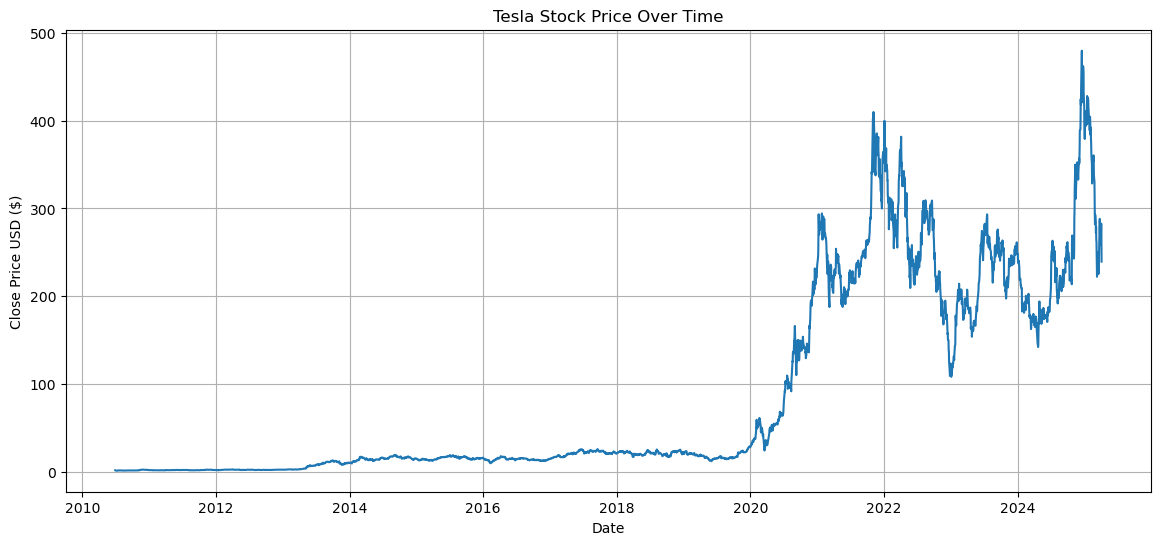

In [7]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(14,6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.grid()
    plt.show()

make_graph(tesla_data, 'Tesla Stock Price Over Time')

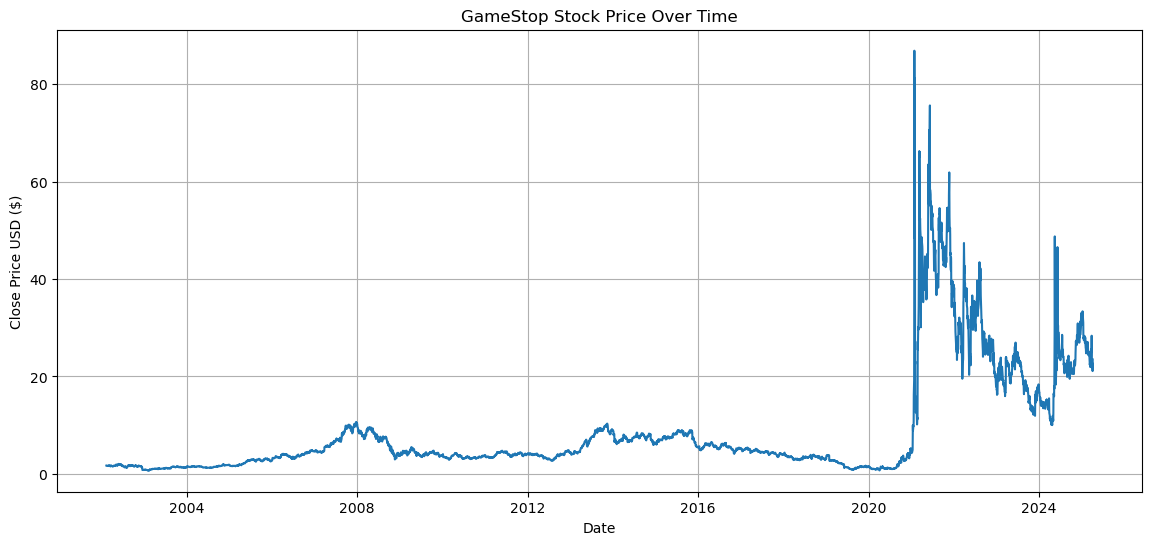

In [8]:
make_graph(gme_data, 'GameStop Stock Price Over Time')